In [2]:
# import neccessary packages

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as plt
plt.rcParams['figure.figsize'] = [10, 6]
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
import xgboost as xgb
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
import category_encoders as ce
from sklearn.utils import resample, shuffle
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from prettytable import PrettyTable 
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from matplotlib.cm import viridis
from sklearn.pipeline import Pipeline
colors = viridis(np.linspace(0, 1, 4))
import joblib

## Exploratory Data Analysis

In [3]:
# load data
df = pd.read_csv('Dataset Heart Disease.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head(10)

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,54,1,3,150,195.0,0,0,122,0,0.0,1,0
5,39,1,3,120,339.0,0,0,170,0,0.0,1,0
6,45,0,2,130,237.0,0,0,170,0,0.0,1,0
7,54,1,2,110,208.0,0,0,142,0,0.0,1,0
8,37,1,4,140,207.0,0,0,130,1,1.5,2,1
9,48,0,2,120,284.0,0,0,120,0,0.0,1,0


In [4]:
# view data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1048 non-null   int64  
 1   sex                  1048 non-null   int64  
 2   chest pain type      1048 non-null   int64  
 3   resting bps          1048 non-null   int64  
 4   cholesterol          1048 non-null   float64
 5   fasting blood sugar  1048 non-null   int64  
 6   resting ecg          1048 non-null   int64  
 7   max heart rate       1048 non-null   int64  
 8   exercise angina      1048 non-null   int64  
 9   oldpeak              1048 non-null   float64
 10  ST slope             1048 non-null   int64  
 11  target               1048 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 98.4 KB


In [5]:
# number of observations
len(df)

1048

In [6]:
# number of features
len(df.columns)

12

In [7]:
# check for null values
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bps            0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [8]:
# 5 number summary of variables
df.describe()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,53.325382,0.734733,2.817748,132.613550,245.172710,0.162214,0.606870,142.918893,0.368321,0.942366,1.532443,0.496183
std,9.397822,0.441686,1.118649,17.367605,57.101359,0.368823,0.763313,24.427115,0.482579,1.100429,0.611023,0.500224
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000
75%,60.000000,1.000000,4.000000,140.000000,275.000000,0.000000,1.000000,162.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


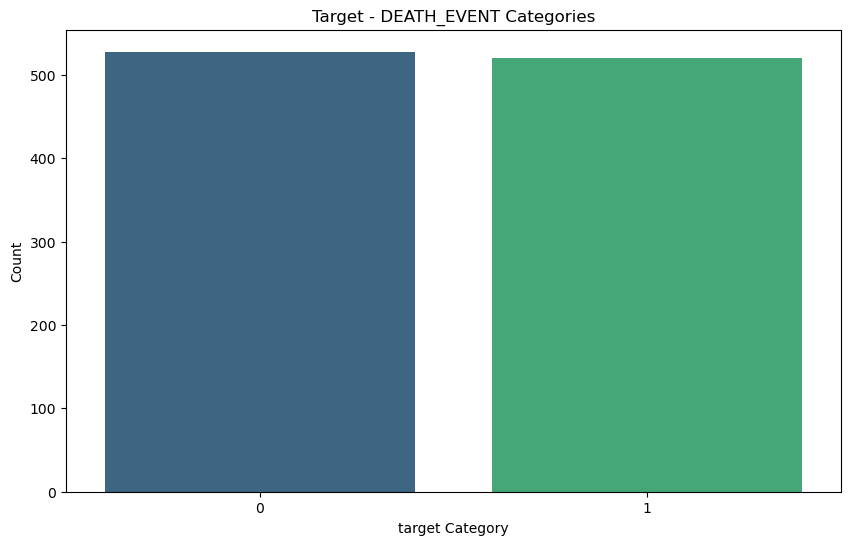

target
0    528
1    520
Name: count, dtype: int64


In [9]:
# visualize independent variable
plt.figure(figsize=(10, 6))  
sns.countplot(x='target', data=df, palette='viridis')
plt.xlabel('target Category')
plt.ylabel('Count')
plt.title('Target - DEATH_EVENT Categories')
plt.show()

print(df['target'].value_counts())

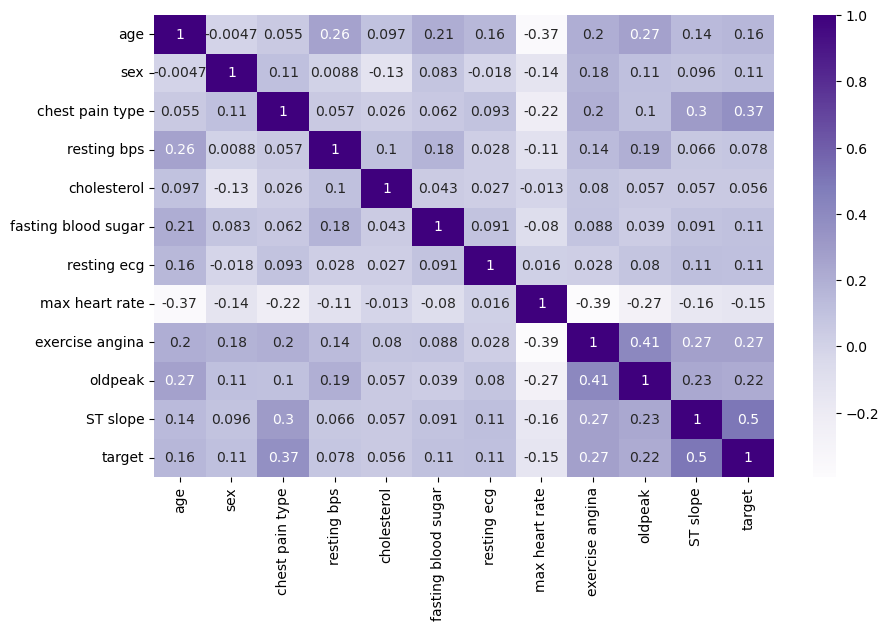

In [10]:
data = df
cor_matrix = data.corr()
sns.heatmap(cor_matrix, annot=True, cmap = "Purples")
plt.show()

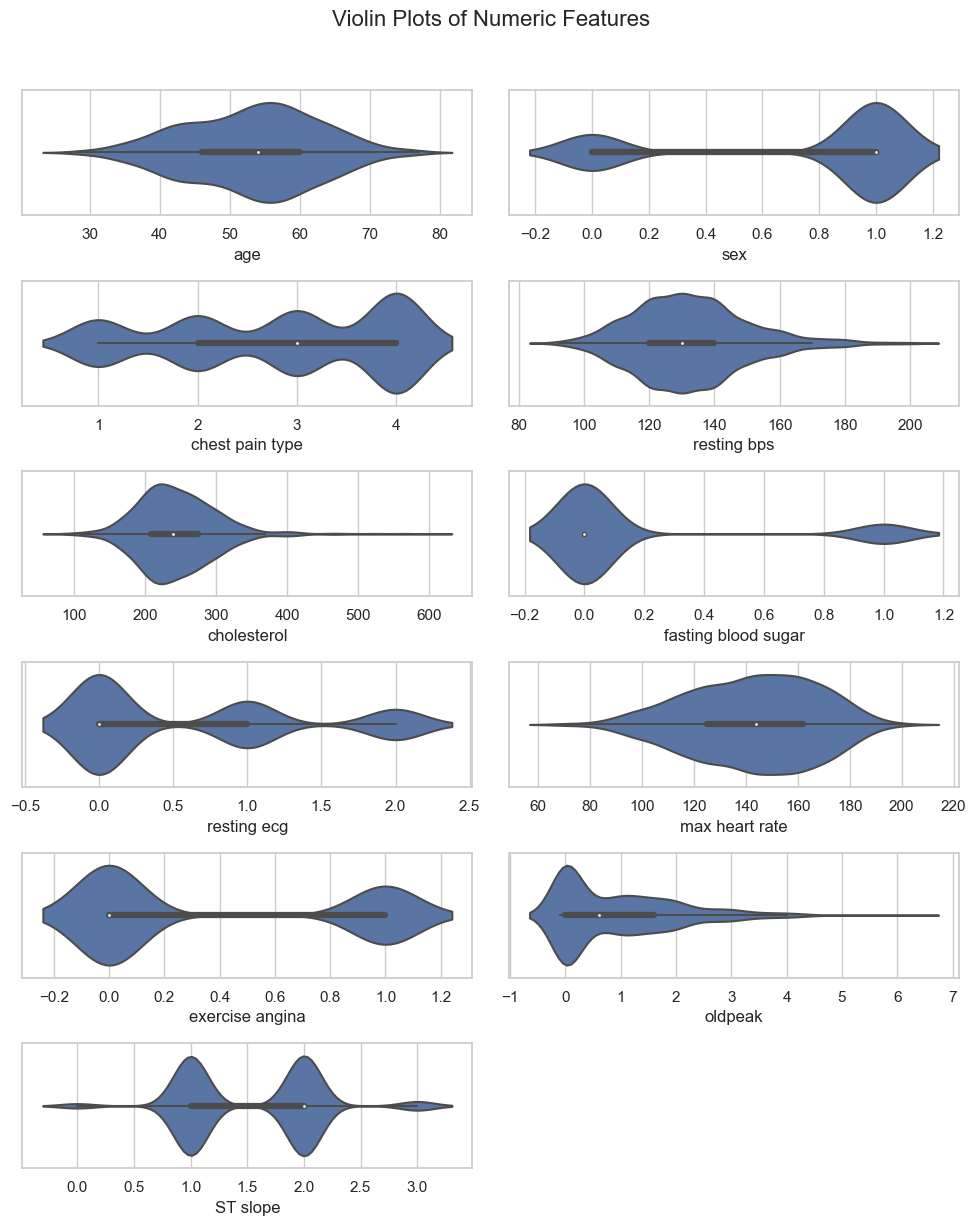

In [11]:
data_num = data.iloc[:, :-1]
sns.set(style="whitegrid")
num_features = len(data_num.columns)
num_rows = 6
num_cols = (num_features - 1) // num_rows + 1

plt.figure(figsize=(10, 12))

for i, feature in enumerate(data_num.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.violinplot(x=data_num[feature])

plt.suptitle('Violin Plots of Numeric Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

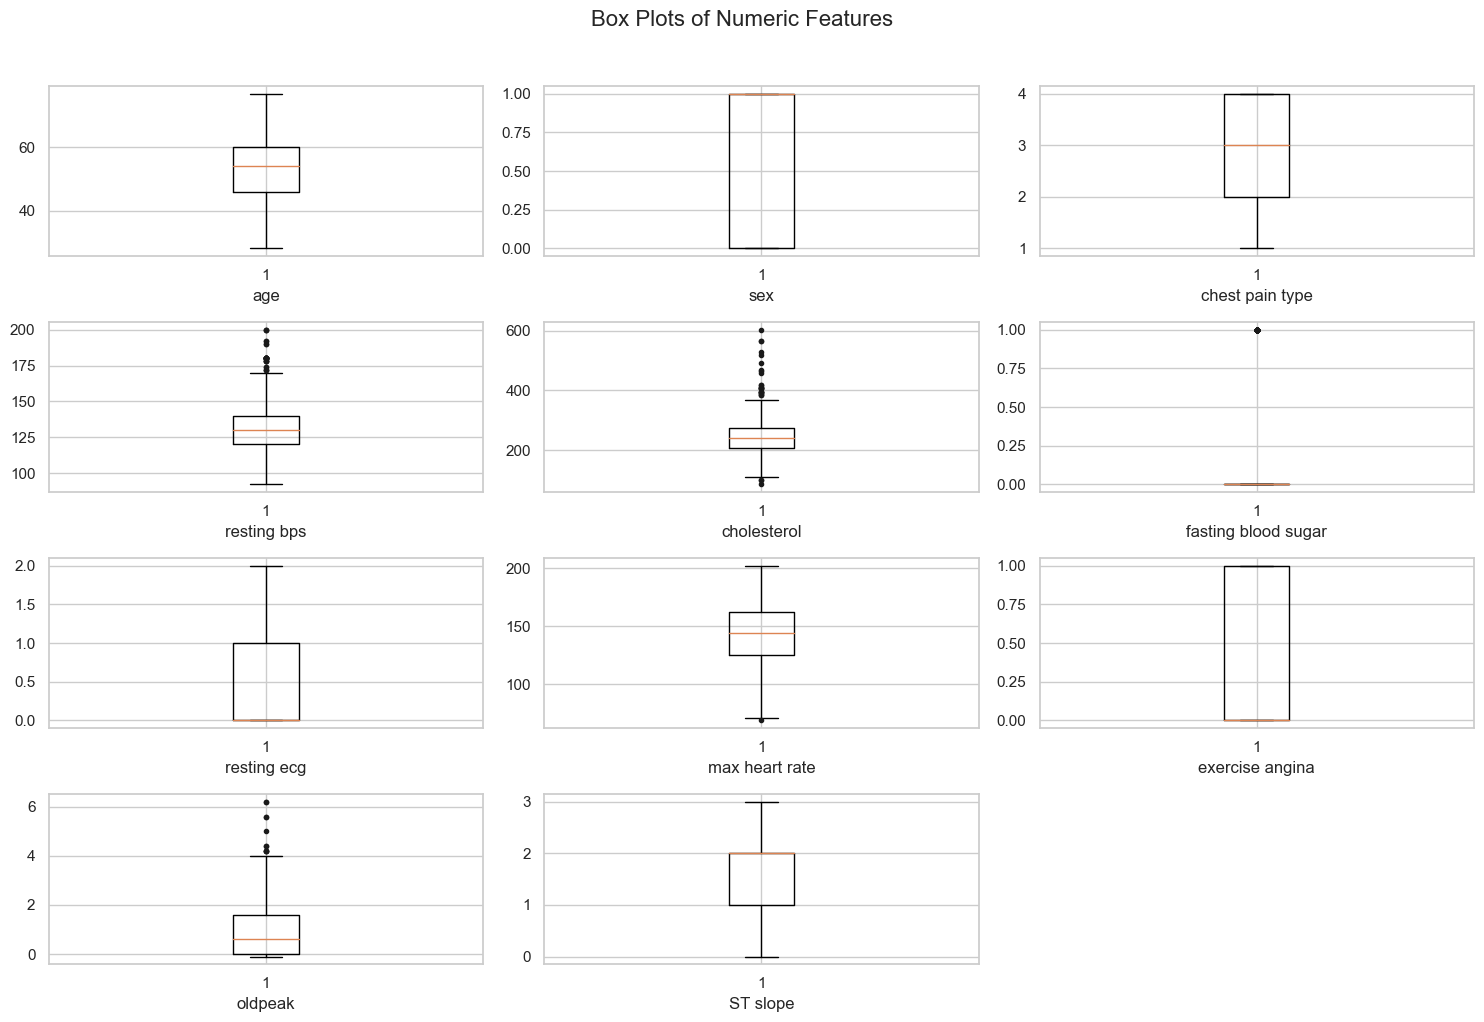

In [12]:
num_features = len(data_num.columns)
num_rows = 4
num_cols = (num_features - 1) // num_rows + 1

plt.figure(figsize=(15, 10))

for i, feature in enumerate(data_num.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.boxplot(x=data_num[feature], sym='k.')
    plt.xlabel(feature)

plt.suptitle('Box Plots of Numeric Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## Splitting the Data

In [13]:
Y = data["target"]
X = data.drop(["target"], axis=1)

In [14]:
Y.head()

0    0
1    1
2    0
3    1
4    0
Name: target, dtype: int64

In [15]:
X.head()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289.0,0,0,172,0,0.0,1
1,49,0,3,160,180.0,0,0,156,0,1.0,2
2,37,1,2,130,283.0,0,1,98,0,0.0,1
3,48,0,4,138,214.0,0,0,108,1,1.5,2
4,54,1,3,150,195.0,0,0,122,0,0.0,1


In [16]:
# Split data into an 70% train, 30% test set with the remaining data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [17]:
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 733
Test set size: 315


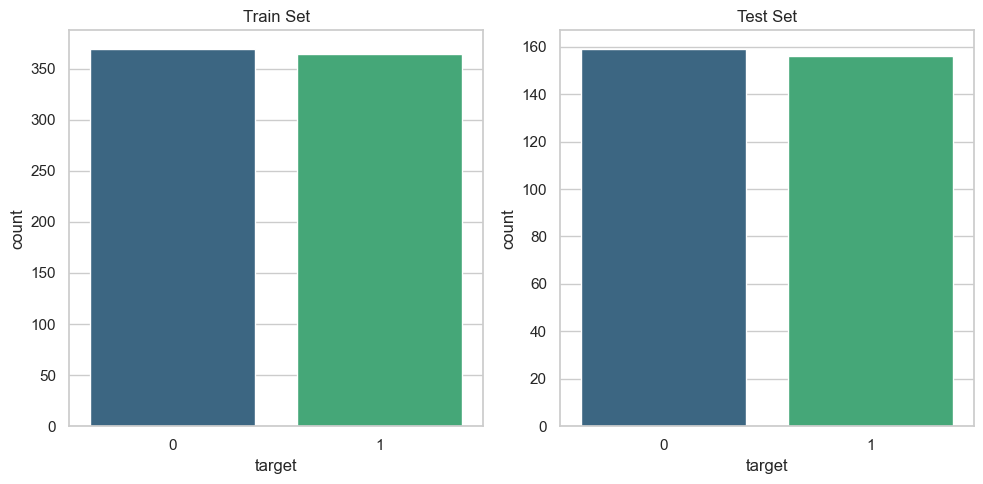

In [18]:
# Plotting the class distribution for y_train and y_test
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette="viridis")
plt.title("Train Set")

plt.subplot(1, 2, 2)
sns.countplot(x=y_test, palette="viridis")
plt.title("Test Set")

plt.tight_layout()
plt.show()

## SMOTE

In [19]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

X_train = X_resampled
y_train = y_resampled

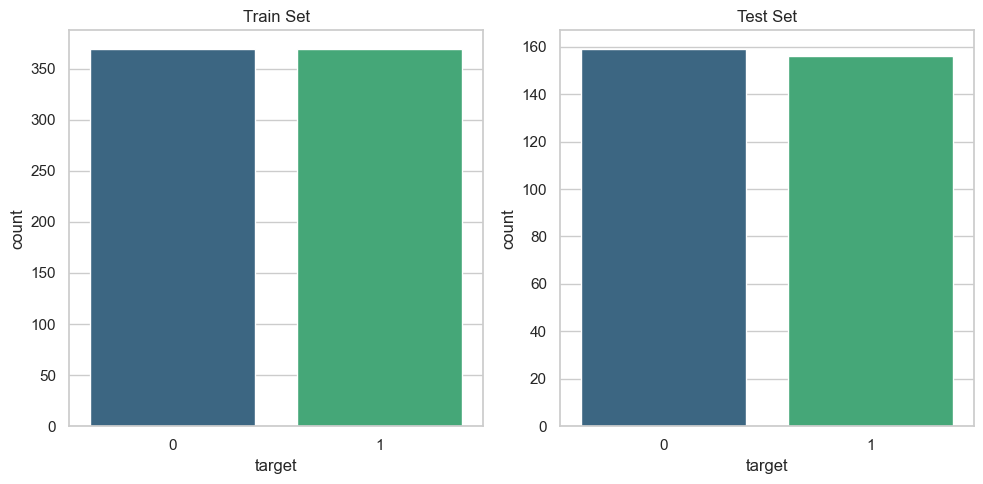

In [20]:
# Plotting the class distribution for y_train and y_test after SMOTE
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette="viridis")
plt.title("Train Set")

plt.subplot(1, 2, 2)
sns.countplot(x=y_test, palette="viridis")
plt.title("Test Set")

plt.tight_layout()
plt.show()

In [21]:
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 738
Test set size: 315


## Feature Selection

In [22]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
feature_importances = tree_model.feature_importances_

In [24]:
sorted_indices = feature_importances.argsort()[::-1]

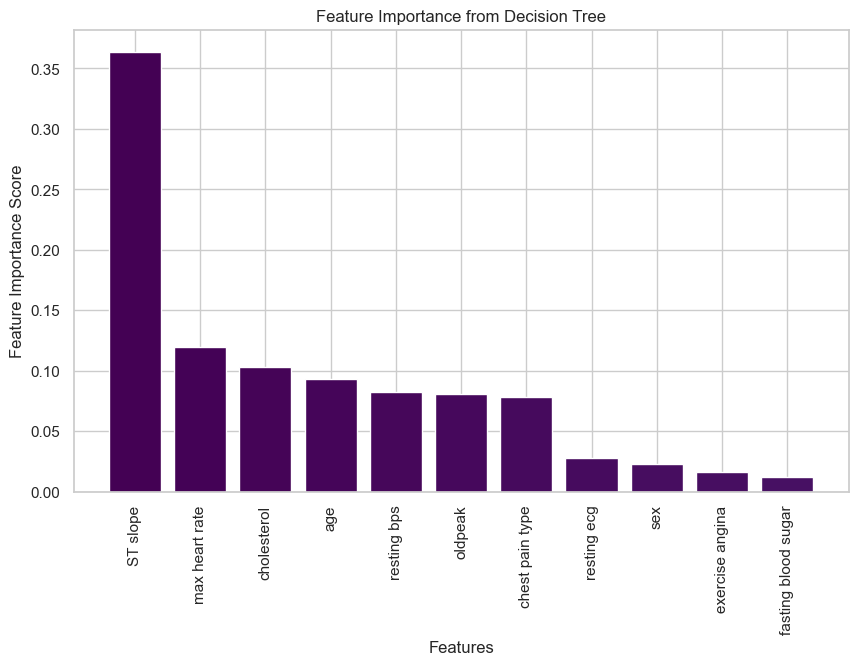

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center', color=plt.cm.viridis(range(len(feature_importances))))
plt.xticks(range(len(feature_importances)), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance from Decision Tree')
plt.show()

### Keeping only important features

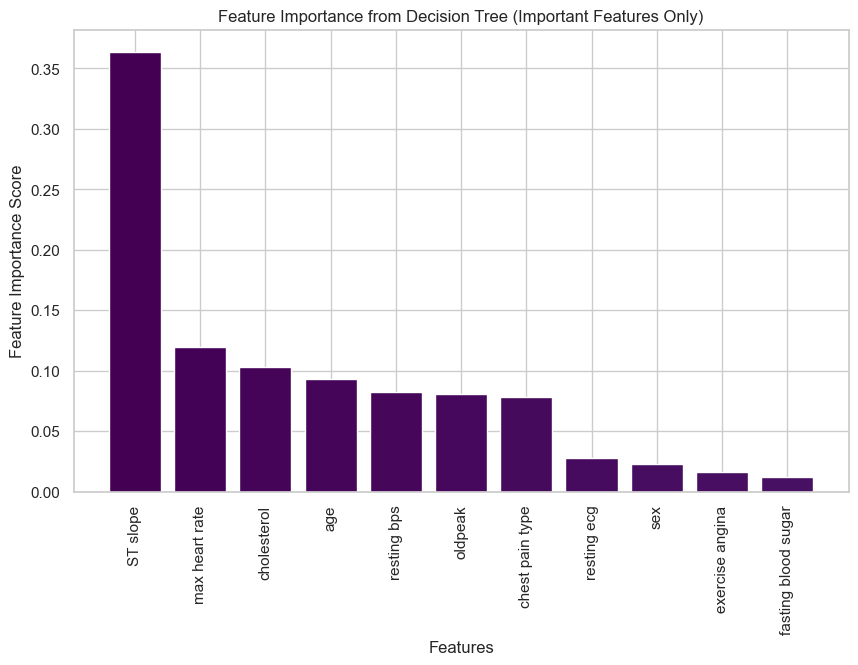

In [26]:
threshold = 0.001

important_feature_indices = sorted_indices[feature_importances[sorted_indices] > threshold]

important_features = X_train.columns[important_feature_indices]

X_train = X_train.iloc[:, important_feature_indices]
X_test = X_test.iloc[:, important_feature_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(important_features)), 
        feature_importances[important_feature_indices], 
        align='center', color=plt.cm.viridis(range(len(feature_importances))))
plt.xticks(range(len(important_features)), 
           important_features, 
           rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance from Decision Tree (Important Features Only)')
plt.show()

In [27]:
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 738
Test set size: 315


## Model building (NO TUNING)

### Neural Net

In [28]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_classifier.fit(X_train, y_train)
y_pred_nn = mlp_classifier.predict(X_test)

accuracy_nn = accuracy_score(y_test, y_pred_nn)

precision_nn = precision_score(y_test, y_pred_nn, average='weighted')

recall_nn = recall_score(y_test, y_pred_nn, average='weighted')

f1_nn = f1_score(y_test, y_pred_nn, average='weighted')

### SVM

In [29]:
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

### Random Forest

In [30]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

### XGB

In [31]:

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test, label=y_test_encoded)

model = xgb.train({}, dtrain)
y_pred = model.predict(dtest)
y_pred_xgb = label_encoder.inverse_transform(y_pred.astype(int))

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted', zero_division=1)

### Model Results

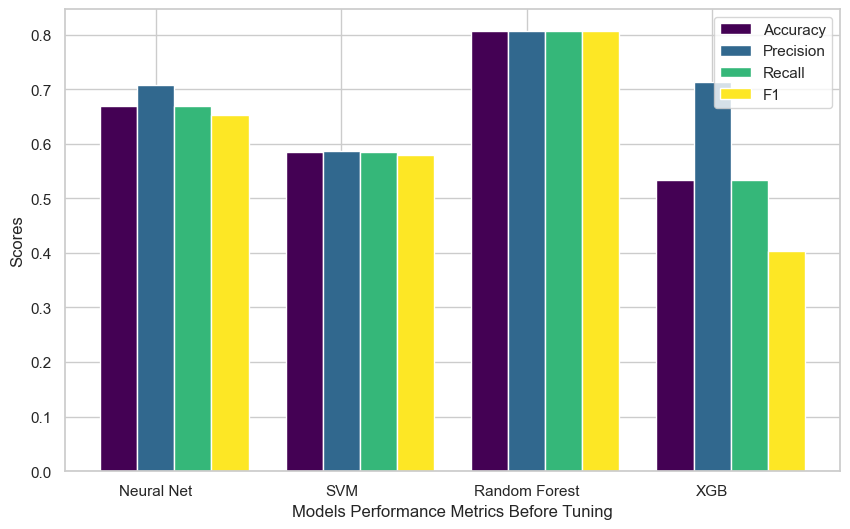

In [32]:
# create data 
x = np.arange(4) 
acc = [accuracy_nn, accuracy_svm, accuracy_rf, accuracy_xgb] 
prec = [precision_nn, precision_svm, precision_rf, precision_xgb] 
rec = [recall_nn, recall_svm, recall_rf, recall_xgb] 
f = [f1_nn, f1_svm, f1_rf, f1_xgb] 
width = 0.2


  
# plot data in grouped manner of bar type 
plt.bar(x-0.2, acc, width, color=colors[0]) 
plt.bar(x, prec, width, color=colors[1]) 
plt.bar(x+0.2, rec, width, color=colors[2]) 
plt.bar(x+0.4, f, width, color=colors[3]) 
plt.xticks(x, ['Neural Net', 'SVM', 'Random Forest', 'XGB']) 
plt.xlabel("Models Performance Metrics Before Tuning") 
plt.ylabel("Scores") 
plt.legend(["Accuracy", "Precision", "Recall", "F1"]) 
plt.show()


In [33]:
myTable = PrettyTable(["Model Name", "Accuracy", "Precision", "Recall", "F1"]) 

myTable.add_row(["Neural Net", accuracy_nn, precision_nn, recall_nn, f1_nn ]) 
myTable.add_row(["SVM", accuracy_svm, precision_svm, recall_svm, f1_svm]) 
myTable.add_row(["Random Forest", accuracy_rf, precision_rf, recall_rf, f1_rf]) 
myTable.add_row(["XGB", accuracy_xgb, precision_xgb, recall_xgb, f1_xgb])

print(myTable)

+---------------+--------------------+--------------------+--------------------+---------------------+
|   Model Name  |      Accuracy      |     Precision      |       Recall       |          F1         |
+---------------+--------------------+--------------------+--------------------+---------------------+
|   Neural Net  | 0.6698412698412698 | 0.707469916280489  | 0.6698412698412698 |  0.652916884072919  |
|      SVM      | 0.5841269841269842 | 0.5871346302748742 | 0.5841269841269842 |  0.579081929619564  |
| Random Forest | 0.8063492063492064 | 0.8063732660685011 | 0.8063492063492064 |  0.8063531097727488 |
|      XGB      | 0.5333333333333333 | 0.7125598086124402 | 0.5333333333333333 | 0.40381267702176643 |
+---------------+--------------------+--------------------+--------------------+---------------------+


## Model building (WITH TUNING)

### Neural Net

In [34]:
mlp_classifier = MLPClassifier(max_iter=2000, random_state=42)

param_grid = {
    'mlp__hidden_layer_sizes': [(100, 50), (50, 25)],
    'mlp__solver': ['adam', 'sgd'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate': ['constant', 'adaptive'],
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp_classifier) 
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_mlp_classifier = grid_search.best_estimator_
y_pred_nn_cv = best_mlp_classifier.predict(X_test)

accuracy_nn = accuracy_score(y_test, y_pred_nn_cv)
precision_nn = precision_score(y_test, y_pred_nn_cv, average='weighted')
recall_nn = recall_score(y_test, y_pred_nn_cv, average='weighted')
f1_nn = f1_score(y_test, y_pred_nn_cv, average='weighted')

### SVM

In [35]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

svm_classifier = SVC(random_state=42)

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_svm_classifier = grid_search.best_estimator_
y_pred_svm_cv = best_svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm_cv)
precision_svm = precision_score(y_test, y_pred_svm_cv, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm_cv, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm_cv, average='weighted')

### Random Forest

In [28]:
rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_rf_cv = best_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf_cv)
precision_rf = precision_score(y_test, y_pred_rf_cv, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf_cv, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf_cv, average='weighted')

## Export Best Model for Streamlit

In [29]:
import joblib
joblib.dump(best_model, 'best_model_heart.pkl')

['best_model_heart.pkl']

### XGB

In [37]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_classifier = XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train_encoded)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_pred_xgb_cv = label_encoder.inverse_transform(y_pred)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb_cv)
precision_xgb = precision_score(y_test, y_pred_xgb_cv, average='weighted', zero_division=1)
recall_xgb = recall_score(y_test, y_pred_xgb_cv, average='weighted', zero_division=1)
f1_xgb = f1_score(y_test, y_pred_xgb_cv, average='weighted', zero_division=1)

### Model Results after Tuning

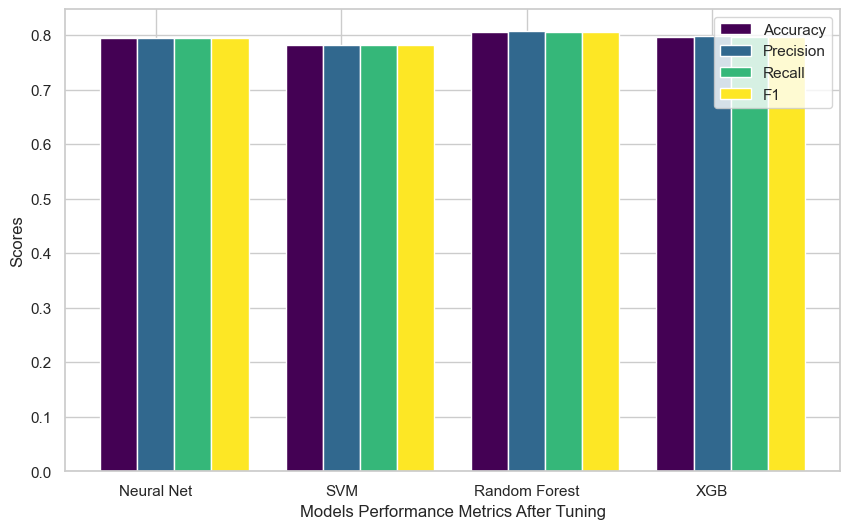

In [38]:
# create data 
x = np.arange(4) 
acc = [accuracy_nn, accuracy_svm, accuracy_rf, accuracy_xgb] 
prec = [precision_nn, precision_svm, precision_rf, precision_xgb] 
rec = [recall_nn, recall_svm, recall_rf, recall_xgb] 
f = [f1_nn, f1_svm, f1_rf, f1_xgb] 
width = 0.2


plt.bar(x-0.2, acc, width, color=colors[0]) 
plt.bar(x, prec, width, color=colors[1]) 
plt.bar(x+0.2, rec, width, color=colors[2]) 
plt.bar(x+0.4, f, width, color=colors[3])  
plt.xticks(x, ['Neural Net', 'SVM', 'Random Forest', 'XGB']) 
plt.xlabel("Models Performance Metrics After Tuning") 
plt.ylabel("Scores") 
plt.legend(["Accuracy", "Precision", "Recall", "F1"]) 
plt.show()

In [39]:
myTable = PrettyTable(["Model Name", "Accuracy", "Precision", "Recall", "F1"]) 

myTable.add_row(["Neural Net", accuracy_nn, precision_nn, recall_nn, f1_nn ]) 
myTable.add_row(["SVM", accuracy_svm, precision_svm, recall_svm, f1_svm]) 
myTable.add_row(["Random Forest", accuracy_rf, precision_rf, recall_rf, f1_rf]) 
myTable.add_row(["XGB", accuracy_xgb, precision_xgb, recall_xgb, f1_xgb])

print(myTable)

+---------------+--------------------+--------------------+--------------------+--------------------+
|   Model Name  |      Accuracy      |     Precision      |       Recall       |         F1         |
+---------------+--------------------+--------------------+--------------------+--------------------+
|   Neural Net  | 0.7936507936507936 | 0.7937947796438364 | 0.7936507936507936 | 0.7936507936507937 |
|      SVM      | 0.780952380952381  | 0.7813019278857788 | 0.780952380952381  | 0.7809303042126737 |
| Random Forest | 0.8063492063492064 | 0.8070371480849363 | 0.8063492063492064 | 0.8062945518095757 |
|      XGB      | 0.7968253968253968 | 0.7981486829388503 | 0.7968253968253968 | 0.7966819929552847 |
+---------------+--------------------+--------------------+--------------------+--------------------+


Precision/Recall score for Neural Net is : 0.759
Precision/Recall score for Neural Net CV is : 0.843
Precision/Recall score for SVM is : 0.668
Precision/Recall score for SVM CV is : 0.833
Precision/Recall score for Random Forest is : 0.853
Precision/Recall score for Random Forest CV is : 0.852
Precision/Recall score for XGBoost is : 0.718
Precision/Recall score for XGBoost CV is : 0.845


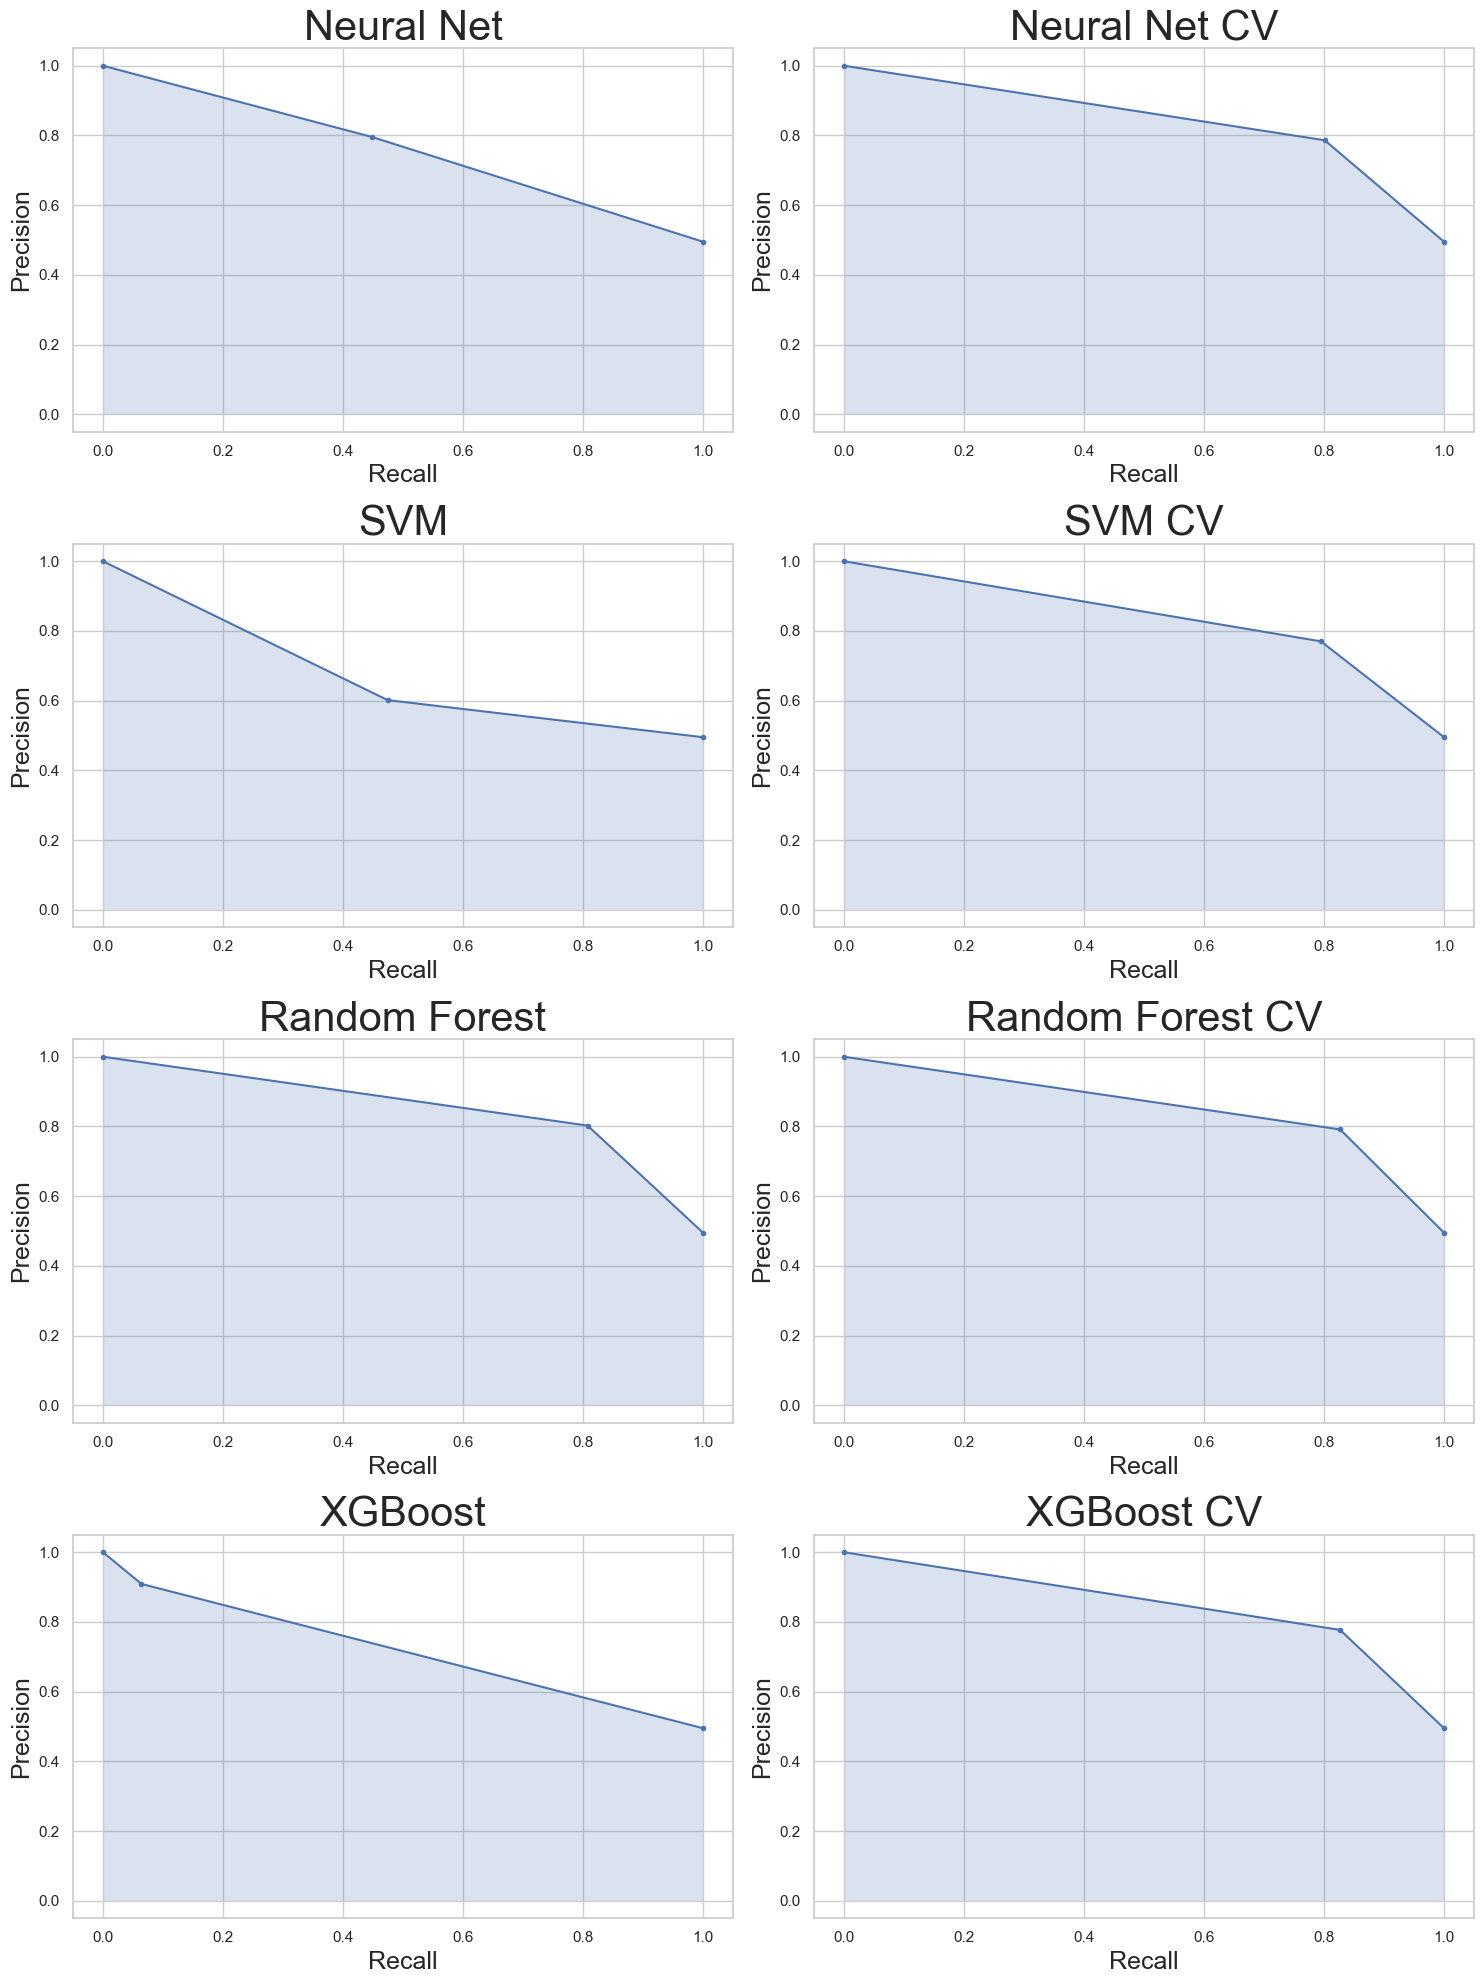

In [40]:
def precision_recall():
    models = ['Neural Net', 'Neural Net CV', 'SVM', 'SVM CV', 'Random Forest', 
              'Random Forest CV', 'XGBoost', 'XGBoost CV']
    
    pred_val = [y_pred_nn, y_pred_nn_cv, y_pred_svm, y_pred_svm_cv, 
                y_pred_rf, y_pred_rf_cv, y_pred_xgb, y_pred_xgb_cv]
    
    f, aa = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
    for i, m, p in zip(aa.flatten(), models, pred_val):
        precision, recall, thresholds = precision_recall_curve(y_test, p)
        i.plot(recall, precision, marker='.')
        i.fill_between(recall, precision, alpha=0.2)
        i.set_xlabel("Recall", fontsize=18)
        i.set_ylabel("Precision", fontsize=18)
        i.set_title(m, fontsize=30)
        pr_score = auc(recall, precision)
        print('Precision/Recall score for', m, 'is : {:.3f}'.format(pr_score))
    plt.tight_layout()
    plt.show()

precision_recall()

RF CV and XG Boost CV have the highest performance

## Stacking

In [41]:
rf_classifier = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=3)

grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_classifier = XGBClassifier()

grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=3)
grid_search_xgb.fit(X_train, y_train_encoded)

best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

estimators = [
    ('xgb', best_model_xgb),
    ('svm', best_svm_classifier)
]

stacked_model = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())

stacked_model.fit(X_train, y_train)

y_pred_stacked = stacked_model.predict(X_test)

accuracy_stacked = accuracy_score(y_test, y_pred_stacked)
precision_stacked = precision_score(y_test, y_pred_stacked, average='weighted')
recall_stacked = recall_score(y_test, y_pred_stacked, average='weighted')
f1_stacked = f1_score(y_test, y_pred_stacked, average='weighted')

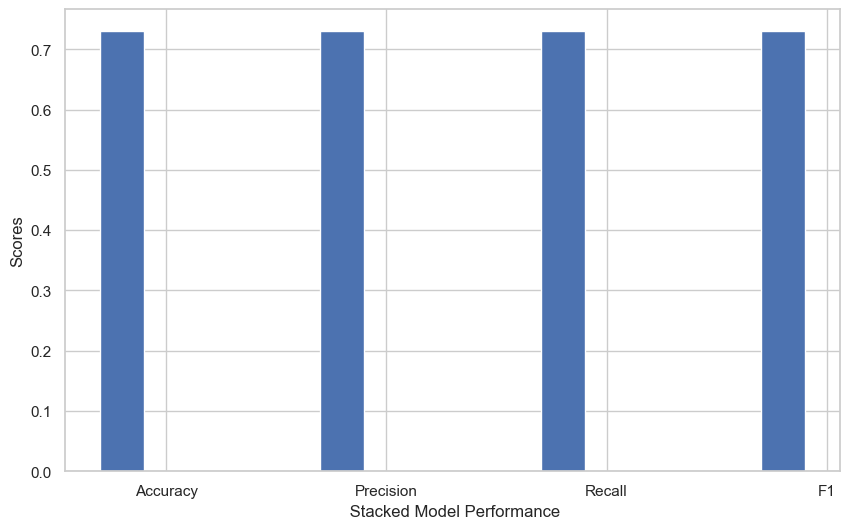

In [42]:
x = np.arange(4) 
acc = [accuracy_stacked] 
prec = [precision_stacked] 
rec = [recall_stacked] 
f = [f1_stacked] 
width = 0.2

plt.bar(x-0.2, acc, width) 
plt.xticks(x, ["Accuracy", "Precision", "Recall", "F1"]) 
plt.xlabel(" Stacked Model Performance") 
plt.ylabel("Scores") 
plt.show()

In [43]:
myTable = PrettyTable(["Model Name", "Accuracy", "Precision", "Recall", "F1"]) 

myTable.add_row(["Stacking", accuracy_stacked, precision_stacked, recall_stacked, f1_stacked]) 

print(myTable)

+------------+--------------------+--------------------+--------------------+--------------------+
| Model Name |      Accuracy      |     Precision      |       Recall       |         F1         |
+------------+--------------------+--------------------+--------------------+--------------------+
|  Stacking  | 0.7301587301587301 | 0.7301843256047884 | 0.7301587301587301 | 0.7301641693554696 |
+------------+--------------------+--------------------+--------------------+--------------------+


Precision/Recall score for Stacked is : 0.795


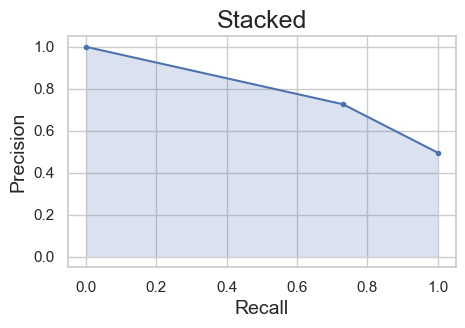

In [44]:
def precision_recall(y_test, y_pred_stacked):
    model = 'Stacked'
    precision, recall, _ = precision_recall_curve(y_test, y_pred_stacked)
    
    plt.figure(figsize=(5, 3))
    plt.plot(recall, precision, marker='.')
    plt.fill_between(recall, precision, alpha=0.2)
    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)
    plt.title(model, fontsize=18)
    pr_score = auc(recall, precision)
    print('Precision/Recall score for', model, 'is : {:.3f}'.format(pr_score))
    plt.show()

precision_recall(y_test, y_pred_stacked)